# Teste A/B

Com o intuito de deixar o nosso aplicativo mais objetivo e intuitivo, fizemos um teste com o total de 30 pessoas (15 para cada fluxo) para avaliar qual dos dois designs era o melhor.

In [17]:
# Libs
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrames
df_fluxo_A = pd.read_excel(r'testeA.xlsx')
df_fluxo_B = pd.read_excel(r'testeB.xlsx')

##### Análise descritiva

In [20]:
# Estatísticas descritivas
print("Estatísticas Fluxo A:")
print(df_fluxo_A.describe())

print("\nEstatísticas Fluxo B:")
print(df_fluxo_B.describe())

Estatísticas Fluxo A:
              ID  Tempo (segundos)
count  15.000000         15.000000
mean    8.000000         13.579333
std     4.472136          2.604157
min     1.000000         10.430000
25%     4.500000         11.490000
50%     8.000000         12.520000
75%    11.500000         16.345000
max    15.000000         17.540000

Estatísticas Fluxo B:
              ID  Tempo (segundos)
count  15.000000         15.000000
mean    8.000000         13.922667
std     4.472136          2.322374
min     1.000000         10.190000
25%     4.500000         12.090000
50%     8.000000         14.270000
75%    11.500000         15.275000
max    15.000000         17.640000


##### Descobrindo o valor das váriaveis "T" e "P"

In [18]:
t_stat, p_value = stats.ttest_ind(df_fluxo_A["Tempo (segundos)"], df_fluxo_B["Tempo (segundos)"], equal_var=False)
t_stat, p_value

(-0.38108873604359883, 0.7060509447310896)

**Valor p**:
O valor p de 0.71 é significativamente maior que 0.05. Isso indica que não há diferença estatisticamente significativa entre os tempos dos fluxos A e B. Portanto, você não pode rejeitar a hipótese nula de que os dois fluxos têm desempenhos similares em termos de tempo.

**Estatística t**:
A estatística t negativa sugere que a média do fluxo A é um pouco menor do que a do fluxo B, mas a magnitude é muito pequena e, juntamente com o valor p alto, não sugere uma conclusão prática sobre eficiência.

##### Plotando gráficos para facilitar a análise

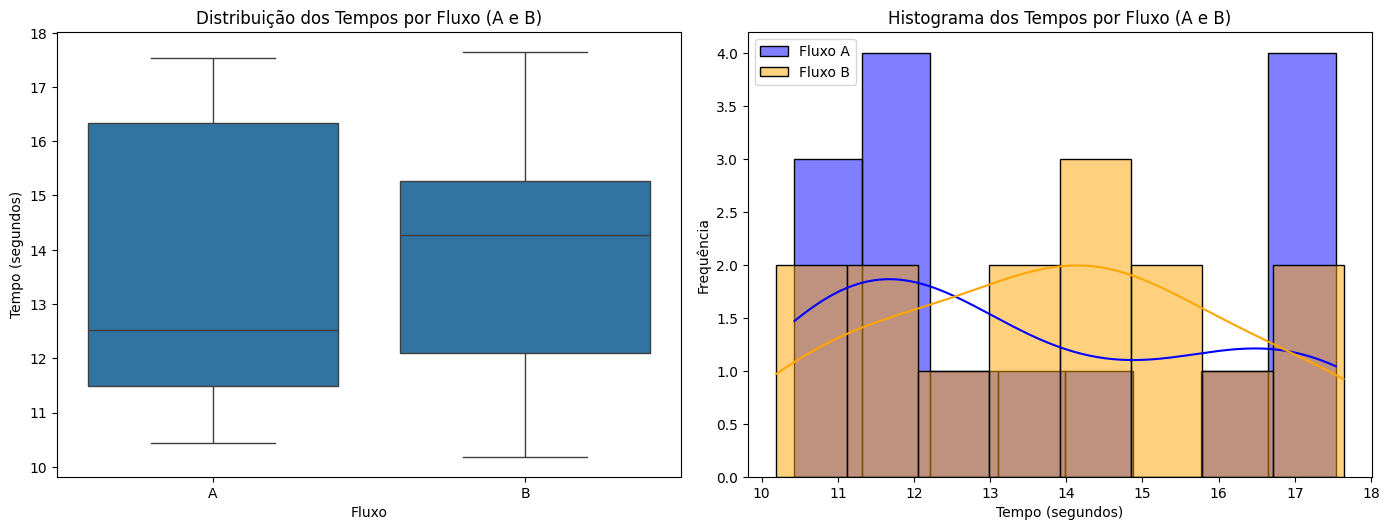

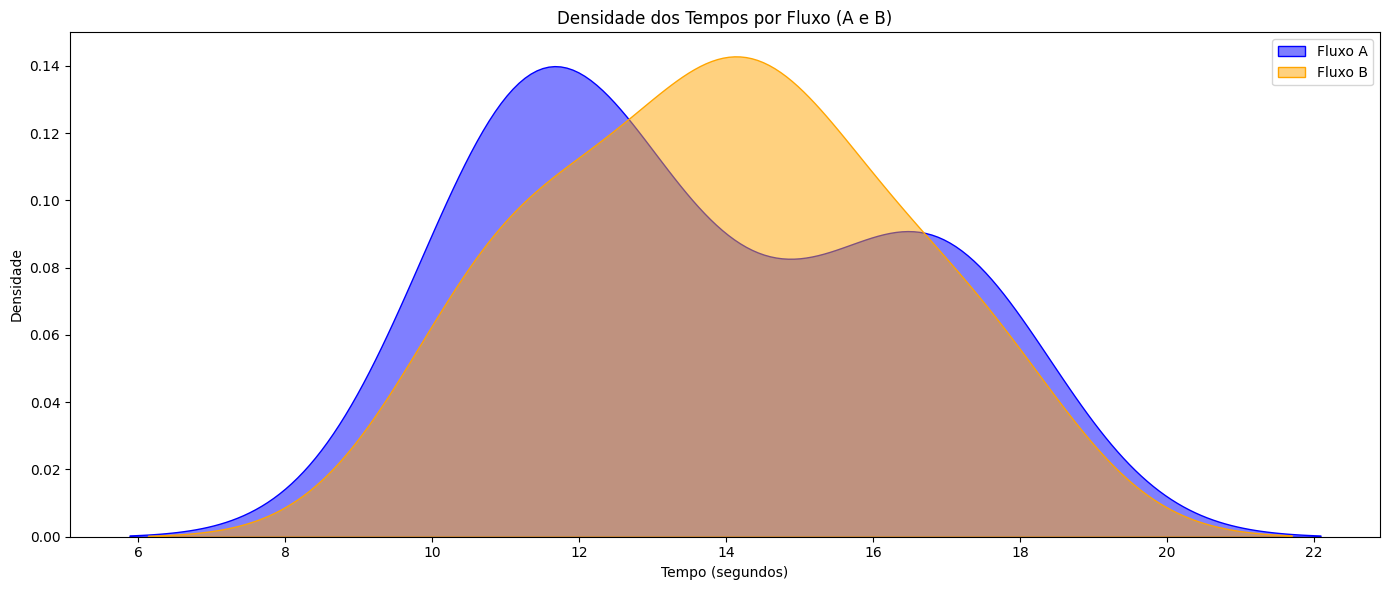

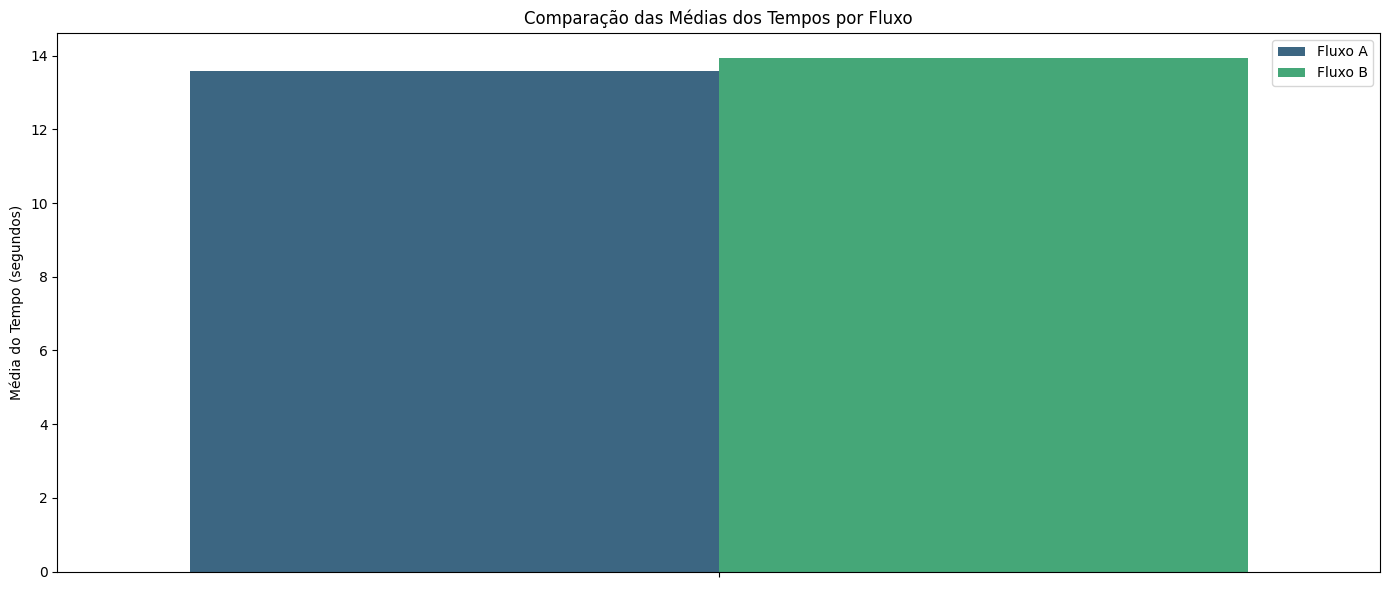

In [42]:
plt.figure(figsize=(14, 10))

# Boxplot
plt.subplot(2, 2, 1)
df_fluxo_A["Fluxo"] = "A"
df_fluxo_B["Fluxo"] = "B"
df_combined = pd.concat([df_fluxo_A, df_fluxo_B])
sns.boxplot(data=df_combined, x="Fluxo", y="Tempo (segundos)")
plt.ylabel("Tempo (segundos)")
plt.title("Distribuição dos Tempos por Fluxo (A e B)")

# Histograma
plt.subplot(2, 2, 2)
sns.histplot(df_fluxo_A["Tempo (segundos)"], color="blue", kde=True, label="Fluxo A", bins=8)
sns.histplot(df_fluxo_B["Tempo (segundos)"], color="orange", kde=True, label="Fluxo B", bins=8)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Frequência")
plt.legend()
plt.title("Histograma dos Tempos por Fluxo (A e B)")

plt.tight_layout()
plt.show()

# Gráfico de Densidade
plt.figure(figsize=(14, 6))
sns.kdeplot(df_fluxo_A['Tempo (segundos)'], color='blue', label='Fluxo A', fill=True, alpha=0.5)
sns.kdeplot(df_fluxo_B['Tempo (segundos)'], color='orange', label='Fluxo B', fill=True, alpha=0.5)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Densidade")
plt.title("Densidade dos Tempos por Fluxo (A e B)")
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de Barras
plt.figure(figsize=(14, 6))
means = [df_fluxo_A['Tempo (segundos)'].mean(), df_fluxo_B['Tempo (segundos)'].mean()]
sns.barplot(hue=["Fluxo A", "Fluxo B"], y=means, palette="viridis")
plt.ylabel("Média do Tempo (segundos)")
plt.title("Comparação das Médias dos Tempos por Fluxo")
plt.tight_layout()
plt.show()

**Eficiência**:

O fluxo A é mais eficiente, pois, em média, leva aproximadamente 0.34 segundos menos para concluir a tarefa em comparação ao fluxo B.

**Significância Estatística**:

O valor p de 0.71 indica que, apesar dessa diferença de tempo, não há evidências estatísticas suficientes para afirmar que essa diferença é significativa. Isso sugere que a variação observada poderia ser devido a ruído ou outras variáveis não controladas.

##### Conclusão  
**Fluxo A**: Tem um desempenho levemente melhor, com um tempo médio de 13.58 segundos  
**Fluxo B**: Leva 13.92 segundos, sendo ligeiramente menos eficiente.

Embora o fluxo A seja mais rápido em média, a falta de significância estatística significa que, em um contexto mais amplo ou com uma amostra maior, a diferença pode não ser tão clara. Assim, podemos considerar o fluxo A como mais eficiente.